# Loudoun County Growth Study

## Import Libraries

In [1]:
# Import Necessary Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configure Matplotlib
%matplotlib inline
plt.style.use('seaborn')

C:\Users\AKKem\AppData\Local\Temp\ipykernel_16760\2712318542.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Define File Paths

In [2]:
# Define File Paths for Demographic Data
demographic_files = {
    "2010": {
        "household_income": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2010\2010_household_income.csv",
        "housing_characteristics": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2010\2010_housing_characteristics.csv",
        "housing_occupancy": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2010\2010_housing_occupancy.csv",
        "population_age_sex": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2010\2010_population_age_sex.csv"
    },
    "2015": {
        "household_income": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2015\2015_household_income.csv",
        "housing_characteristics": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2015\2015_housing_characteristics.csv",
        "housing_occupancy": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2015\2015_housing_occupancy.csv",
        "population_age_sex": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2015\2015_population_age_sex.csv"
    },
    "2020": {
        "household_income": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2020\2020_household_income.csv",
        "housing_characteristics": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2020\2020_housing_characteristics.csv",
        "housing_occupancy": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2020\2020_housing_occupancy.csv",
        "population_age_sex": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2020\2020_population_age_sex.csv"
    },
    "2023": {
        "household_income": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2023\2023_household_income.csv",
        "housing_characteristics": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2023\2023_housing_characteristics.csv",
        "housing_occupancy": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2023\2023_housing_occupancy.csv",
        "population_age_sex": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\US Census\2023\2023_population_age_sex.csv"
    }
}

In [3]:
# Define File Paths for BLS Data
bls_files = {
    "Retail Trade": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Retail Trade\2020_retail_trade.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Retail Trade\2021_retail_trade.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Retail Trade\2022_retail_trade.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Retail Trade\2023_retail_trade.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Retail Trade\2024_q1_retail_trade.csv"
    ],
    "Construction": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Construction\2020_construction.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Construction\2021_construction.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Construction\2022_construction.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Construction\2023_construction.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Construction\2024_q1_construction.csv"
    ],
    "Professional, Scientific, & Technical Services": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Professional, Scientific, & Technical Services\2020_professional_scientific_technical_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Professional, Scientific, & Technical Services\2021_professional_scientific_technical_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Professional, Scientific, & Technical Services\2022_professional_scientific_technical_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Professional, Scientific, & Technical Services\2023_professional_scientific_technical_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Professional, Scientific, & Technical Services\2024_q1_professional_scientific_technical_services.csv"
    ],
    "Educational Services": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Education Services\2020_educational_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Education Services\2021_educational_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Education Services\2022_educational_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Education Services\2023_educational_services.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Education Services\2024_q1_educational_services.csv"
    ],
    "Manufacturing": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Manufacturing\2020_manufacturing.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Manufacturing\2021_manufacturing.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Manufacturing\2022_manufacturing.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Manufacturing\2023_manufacturing.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Manufacturing\2024_q1_manufacturing.csv"
    ],
    "Information Technology": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Information Technology\2020_information_tech.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Information Technology\2021_information_tech.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Information Technology\2022_information_tech.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Information Technology\2023_information_tech.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Information Technology\2024_q1_information_tech.csv"
    ],
    "Healthcare and Social Assistance": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Healthcare and Social Assistance\2020_healthcare_social_assistance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Healthcare and Social Assistance\2021_healthcare_social_assistance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Healthcare and Social Assistance\2022_healthcare_social_assistance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Healthcare and Social Assistance\2023_healthcare_social_assistance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Healthcare and Social Assistance\2024_q1_healthcare_social_assistance.csv"
    ],
    "Finance and Insurance": [ 
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Finance and Insurance\2020_finance_insurance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Finance and Insurance\2021_finance_insurance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Finance and Insurance\2022_finance_insurance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Finance and Insurance\2023_finance_insurance.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Bureau of Labor Statistics\Finance and Insurance\2024_q1_finance_insurance.csv"
    ]
}

In [4]:
# Define File Paths for GDP Data
gdp_files = {
    "Loudoun County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Loudoun_GDP_summary.csv",
    "Fairfax County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Fairfax_GDP_summary.csv",
    "Santa Clara County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Santa_Clara_CA_GDP_summary.csv",
    "Montgomery County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Mountgomery_MD_GDP_summary.csv",
    "Wake County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Wake_NC_GDP_summary.csv",
    "Davidson County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Davidson_TN_GDP_summary.csv",
    "Dallas County": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\U.S. GDP by County, Metro, and Other Areas\Dallas_TX_GDP_summary.csv"
}

In [5]:
# Define File Paths for CBP and Housing Data
cbp_and_housing_files = {
    "CBP_2019": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun County Demographics\2019_CBP.csv",
    "CBP_2020": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun County Demographics\2020_CBP.csv",
    "Decennial_Housing_2020": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun County Demographics\2020_decennial_population_housing.csv",
    "CBP_2021": r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun County Demographics\2021_CBP.csv"
}

In [6]:
# Function to Load Data with Error Handling
def load_data(file_path):
    if os.path.exists(file_path):
        try:
            data = pd.read_csv(file_path)
            print(f"Loaded {os.path.basename(file_path)}")
            return data
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            return None
    else:
        print(f"File not found: {file_path}")
        return None



In [7]:
# Example: Load 2010 Household Income Data
household_income_2010 = load_data(demographic_files["2010"]["household_income"])

if household_income_2010 is not None:
    print(household_income_2010.head())
else:
    print("Data could not be loaded.")


Loaded 2010_household_income.csv
     Label (Grouping) Santa Clara County, California!!Households!!Estimate  \
0               Total                                            599,235     
1   Less than $10,000                                               4.5%     
2  $10,000 to $14,999                                               3.1%     
3  $15,000 to $24,999                                               7.0%     
4  $25,000 to $34,999                                               6.1%     

  Santa Clara County, California!!Households!!Margin of Error  \
0                                             ±3,770            
1                                               ±0.5            
2                                               ±0.4            
3                                               ±0.5            
4                                               ±0.5            

  Santa Clara County, California!!Families!!Estimate  \
0                                            424,86

In [8]:
def clean_data(df):
    """
    Cleans and preprocesses the input DataFrame:
    - Simplifies column names.
    - Removes margin symbols (e.g., ±).
    - Removes commas globally from numeric-like strings.
    - Replaces non-numeric placeholders like '(X)', 'N', etc., with NaN.
    - Converts percentage strings to numeric values.
    - Handles missing values.
    """
    # Step 1: Simplify column names
    def clean_column_names(df):
        df.columns = (
            df.columns.str.strip()
            .str.lower()
            .str.replace(r"[^\w\s]", "", regex=True)
            .str.replace(r"\s+", "_", regex=True)
        )
        return df

    # Step 2: Remove margin symbols (e.g., ±)
    def remove_margin_symbols(df):
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace('±', '', regex=False)
        return df

    # Step 3: Remove commas globally
    def remove_commas(df):
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace(',', '', regex=False)
        return df

    # Step 4: Replace non-numeric placeholders with NaN
    def replace_non_numeric(df):
        placeholders = ['(X)', 'N', 'N/A', 'None']
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = df[col].replace(placeholders, None)
        return df

    # Step 5: Convert percentage strings to numeric
    def convert_percentages(df):
        for col in df.columns:
            if df[col].dtype == 'object' and df[col].str.contains('%').any():
                df[col] = df[col].str.replace('%', '').astype(float) / 100
        return df

    # Step 6: Handle missing values
    def handle_missing_values(df):
        for col in df.columns:
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna("N/A", inplace=True)
        return df

    # Apply transformations in sequence
    df = clean_column_names(df)
    df = remove_margin_symbols(df)
    df = remove_commas(df)
    df = replace_non_numeric(df)  # Replace placeholders before numeric conversion
    df = convert_percentages(df)
    df = handle_missing_values(df)
    return df

# Apply the cleaning function to the 2010 household income data
cleaned_household_income_2010 = clean_data(household_income_2010)

# Display the first few rows of the cleaned data
print(cleaned_household_income_2010.head())


     label_grouping  santa_clara_county_californiahouseholdsestimate  \
0             Total                                         5992.350   
1  Less than $10000                                            0.045   
2  $10000 to $14999                                            0.031   
3  $15000 to $24999                                            0.070   
4  $25000 to $34999                                            0.061   

  santa_clara_county_californiahouseholdsmargin_of_error  \
0                                               3770       
1                                                0.5       
2                                                0.4       
3                                                0.5       
4                                                0.5       

   santa_clara_county_californiafamiliesestimate  \
0                                       4248.660   
1                                          0.029   
2                                          0.018  

In [9]:
# Apply the cleaning function to the 2010 household income data
cleaned_household_income_2010 = clean_data(household_income_2010)

# Display the first few rows of the cleaned data
print(cleaned_household_income_2010.head())


     label_grouping  santa_clara_county_californiahouseholdsestimate  \
0             Total                                         5992.350   
1  Less than $10000                                            0.045   
2  $10000 to $14999                                            0.031   
3  $15000 to $24999                                            0.070   
4  $25000 to $34999                                            0.061   

  santa_clara_county_californiahouseholdsmargin_of_error  \
0                                               3770       
1                                                0.5       
2                                                0.4       
3                                                0.5       
4                                                0.5       

   santa_clara_county_californiafamiliesestimate  \
0                                       4248.660   
1                                          0.029   
2                                          0.018  

In [10]:
# Function to load and clean all datasets in a given file dictionary
def process_all_datasets(file_dict):
    cleaned_datasets = {}
    for key, file_paths in file_dict.items():
        if isinstance(file_paths, dict):  # For nested dictionaries like demographic_files
            cleaned_datasets[key] = process_all_datasets(file_paths)
        elif isinstance(file_paths, list):  # For lists of files like bls_files
            cleaned_datasets[key] = []
            for path in file_paths:
                raw_data = load_data(path)
                if raw_data is not None:
                    cleaned_data = clean_data(raw_data)
                    cleaned_datasets[key].append(cleaned_data)
        else:  # For single file paths like gdp_files
            raw_data = load_data(file_paths)
            if raw_data is not None:
                cleaned_data = clean_data(raw_data)
                cleaned_datasets[key] = cleaned_data
    return cleaned_datasets

# Apply to all file dictionaries
cleaned_demographic_files = process_all_datasets(demographic_files)
cleaned_bls_files = process_all_datasets(bls_files)
cleaned_gdp_files = process_all_datasets(gdp_files)
cleaned_cbp_and_housing_files = process_all_datasets(cbp_and_housing_files)


Loaded 2010_household_income.csv
Loaded 2010_housing_characteristics.csv
Loaded 2010_housing_occupancy.csv
Loaded 2010_population_age_sex.csv
Loaded 2015_household_income.csv
Loaded 2015_housing_characteristics.csv
Loaded 2015_housing_occupancy.csv
Loaded 2015_population_age_sex.csv
Loaded 2020_household_income.csv
Loaded 2020_housing_characteristics.csv
Loaded 2020_housing_occupancy.csv
Loaded 2020_population_age_sex.csv
Loaded 2023_household_income.csv
Loaded 2023_housing_characteristics.csv
Loaded 2023_housing_occupancy.csv
Loaded 2023_population_age_sex.csv
Loaded 2020_retail_trade.csv
Loaded 2021_retail_trade.csv
Loaded 2022_retail_trade.csv
Loaded 2023_retail_trade.csv
Loaded 2024_q1_retail_trade.csv
Loaded 2020_construction.csv
Loaded 2021_construction.csv
Loaded 2022_construction.csv
Loaded 2023_construction.csv
Loaded 2024_q1_construction.csv
Loaded 2020_professional_scientific_technical_services.csv
Loaded 2021_professional_scientific_technical_services.csv
Loaded 2022_profes

In [11]:
import logging
logging.basicConfig(level=logging.INFO)

def process_all_datasets_with_logging(file_dict):
    cleaned_datasets = {}
    for key, file_paths in file_dict.items():
        try:
            if isinstance(file_paths, dict):
                cleaned_datasets[key] = process_all_datasets_with_logging(file_paths)
            elif isinstance(file_paths, list):
                cleaned_datasets[key] = []
                for path in file_paths:
                    raw_data = load_data(path)
                    if raw_data is not None:
                        cleaned_data = clean_data(raw_data)
                        cleaned_datasets[key].append(cleaned_data)
            else:
                raw_data = load_data(file_paths)
                if raw_data is not None:
                    cleaned_data = clean_data(raw_data)
                    cleaned_datasets[key] = cleaned_data
            logging.info(f"Processed dataset: {key}")
        except Exception as e:
            logging.error(f"Error processing dataset {key}: {e}")
    return cleaned_datasets


In [12]:
print(cleaned_demographic_files["2010"]["household_income"].head())
print(cleaned_bls_files["Retail Trade"][0].head())  # First retail trade file
print(cleaned_gdp_files["Loudoun County"].head())


     label_grouping  santa_clara_county_californiahouseholdsestimate  \
0             Total                                         5992.350   
1  Less than $10000                                            0.045   
2  $10000 to $14999                                            0.031   
3  $15000 to $24999                                            0.070   
4  $25000 to $34999                                            0.061   

  santa_clara_county_californiahouseholdsmargin_of_error  \
0                                               3770       
1                                                0.5       
2                                                0.4       
3                                                0.5       
4                                                0.5       

   santa_clara_county_californiafamiliesestimate  \
0                                       4248.660   
1                                          0.029   
2                                          0.018  

In [13]:
import os

# Define a function to save cleaned datasets to a specific folder
def export_cleaned_datasets(cleaned_data, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for key, data in cleaned_data.items():
        if isinstance(data, dict):  # For nested dictionaries
            nested_folder = os.path.join(output_folder, key)
            export_cleaned_datasets(data, nested_folder)
        elif isinstance(data, list):  # For lists of cleaned dataframes
            for idx, df in enumerate(data):
                file_name = f"{key}_{idx + 1}.csv"
                df.to_csv(os.path.join(output_folder, file_name), index=False)
        else:  # For single dataframes
            file_name = f"{key}.csv"
            data.to_csv(os.path.join(output_folder, file_name), index=False)

# Define output directory for cleaned files
cleaned_files_folder = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files"

# Export all cleaned datasets
export_cleaned_datasets(cleaned_demographic_files, os.path.join(cleaned_files_folder, "demographic_files"))
export_cleaned_datasets(cleaned_bls_files, os.path.join(cleaned_files_folder, "bls_files"))
export_cleaned_datasets(cleaned_gdp_files, os.path.join(cleaned_files_folder, "gdp_files"))
export_cleaned_datasets(cleaned_cbp_and_housing_files, os.path.join(cleaned_files_folder, "cbp_and_housing_files"))

cleaned_files_folder

'C:\\Users\\AKKem\\OneDrive\\Desktop\\Data Analysis Modules\\Projects\\Loudoun_Growth_Study\\data\\cleaned_files'

In [14]:
import os
import pandas as pd
import sqlite3

# Define the paths of cleaned datasets
cleaned_files = {
    "gdp": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Wake County.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Dallas County.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Davidson County.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Fairfax County.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Loudoun County.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Montgomery County.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\gdp_files\Santa Clara County.csv",
    ],
    "demographics": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2010\population_age_sex.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2010\household_income.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2010\housing_characteristics.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2010\housing_occupancy.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2015\household_income.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2015\housing_characteristics.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2015\housing_occupancy.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2015\population_age_sex.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2020\household_income.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2020\housing_characteristics.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2020\housing_occupancy.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2020\population_age_sex.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2023\household_income.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2023\housing_characteristics.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2023\housing_occupancy.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\demographic_files\2023\population_age_sex.csv",
    ],
    "cbp_and_housing": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\cbp_and_housing_files\Decennial_Housing_2020.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\cbp_and_housing_files\CBP_2019.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\cbp_and_housing_files\CBP_2020.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\cbp_and_housing_files\CBP_2021.csv",   
    ],
    "bls": [
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Retail Trade_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Construction_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Construction_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Construction_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Construction_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Construction_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Educational Services_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Educational Services_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Educational Services_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Educational Services_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Educational Services_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Finance and Insurance_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Finance and Insurance_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Finance and Insurance_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Finance and Insurance_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Finance and Insurance_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Healthcare and Social Assistance_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Healthcare and Social Assistance_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Healthcare and Social Assistance_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Healthcare and Social Assistance_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Healthcare and Social Assistance_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Information Technology_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Information Technology_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Information Technology_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Information Technology_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Information Technology_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Manufacturing_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Manufacturing_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Manufacturing_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Manufacturing_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Manufacturing_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Professional, Scientific, & Technical Services_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Professional, Scientific, & Technical Services_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Professional, Scientific, & Technical Services_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Professional, Scientific, & Technical Services_4.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Professional, Scientific, & Technical Services_5.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Retail Trade_1.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Retail Trade_2.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Retail Trade_3.csv",
        r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\cleaned_files\bls_files\Retail Trade_4.csv",  
    ]
    
}

# Create a database connection
db_path = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun_Growth_Study.db"
conn = sqlite3.connect(db_path)

# Save each cleaned dataset to the database
for category, file_paths in cleaned_files.items():
    for file_path in file_paths:
        try:
            # Extract a table name from the file name
            table_name = os.path.splitext(os.path.basename(file_path))[0].replace(" ", "_").lower()
            
            # Load the cleaned dataset
            data = pd.read_csv(file_path)
            
            # Save the dataset to the SQLite database
            data.to_sql(table_name, conn, if_exists="replace", index=False)
            
            print(f"Successfully saved {table_name} to the database.")
        except Exception as e:
            print(f"Failed to process {file_path}: {e}")

# Close the database connection
conn.close()

print("All datasets have been saved to the database.")


Successfully saved wake_county to the database.
Successfully saved dallas_county to the database.
Successfully saved davidson_county to the database.
Successfully saved fairfax_county to the database.
Successfully saved loudoun_county to the database.
Successfully saved montgomery_county to the database.
Successfully saved santa_clara_county to the database.
Successfully saved population_age_sex to the database.
Successfully saved household_income to the database.
Successfully saved housing_characteristics to the database.
Successfully saved housing_occupancy to the database.
Successfully saved household_income to the database.
Successfully saved housing_characteristics to the database.
Successfully saved housing_occupancy to the database.
Successfully saved population_age_sex to the database.
Successfully saved household_income to the database.
Successfully saved housing_characteristics to the database.
Successfully saved housing_occupancy to the database.
Successfully saved populatio

In [15]:
import sqlite3

# Connect to the SQLite database
db_path = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun_Growth_Study.db"
conn = sqlite3.connect(db_path)

# Create a cursor to interact with the database
cursor = conn.cursor()


In [16]:
# Query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print all table names
print("Tables in the database:")
for table in tables:
    print(table[0])


Tables in the database:
wake_county
dallas_county
davidson_county
fairfax_county
loudoun_county
montgomery_county
santa_clara_county
household_income
housing_characteristics
housing_occupancy
population_age_sex
decennial_housing_2020
cbp_2019
cbp_2020
cbp_2021
retail_trade_5
construction_1
construction_2
construction_3
construction_4
construction_5
educational_services_1
educational_services_2
educational_services_3
educational_services_4
educational_services_5
finance_and_insurance_1
finance_and_insurance_2
finance_and_insurance_3
finance_and_insurance_4
finance_and_insurance_5
healthcare_and_social_assistance_1
healthcare_and_social_assistance_2
healthcare_and_social_assistance_3
healthcare_and_social_assistance_4
healthcare_and_social_assistance_5
information_technology_1
information_technology_2
information_technology_3
information_technology_4
information_technology_5
manufacturing_1
manufacturing_2
manufacturing_3
manufacturing_4
manufacturing_5
professional,_scientific,_&_techni

In [19]:
# Function to preview data from a table
def preview_table_data(table_name, n=5):
    # Ensure the table name is properly quoted to handle special characters
    query = f'SELECT * FROM "{table_name}" LIMIT {n};'
    data = pd.read_sql(query, conn)
    print(f"Preview of {table_name}:\n")
    print(data.head())
    print("\n")

# Loop through all tables and preview their data
for table in tables:
    preview_table_data(table[0])


Preview of wake_county:

   geofips  geoname  linecode  \
0    37183  Wake NC       1.0   
1    37183  Wake NC       2.0   
2    37183  Wake NC       3.0   

                                         description          2001  \
0       Real GDP (thousands of chained 2017 dollars)  3.877213e+07   
1           Chain-type quantity indexes for real GDP  5.088800e+01   
2  Current-dollar GDP (thousands of current dollars)  3.008125e+07   

           2002          2003          2004          2005          2006  ...  \
0  3.994961e+07  4.128219e+07  4.336197e+07  4.599975e+07  4.928657e+07  ...   
1  5.243300e+01  5.418200e+01  5.691200e+01  6.037400e+01  6.468800e+01  ...   
2  3.155152e+07  3.302896e+07  3.547564e+07  3.860666e+07  4.258699e+07  ...   

           2013          2014          2015          2016        2017  \
0  6.052031e+07  6.412705e+07  6.887624e+07  7.316372e+07  76191172.0   
1  7.943200e+01  8.416600e+01  9.039900e+01  9.602700e+01       100.0   
2  5.749366e+07  6.17

Preview of information_technology_3:

  area_fips  own_code industry_code  agglvl_code  size_code  year  qtr  \
0     US000         0            10           10          0  2022    1   
1     US000         1            10           11          0  2022    1   
2     US000         1           101           12          0  2022    1   
3     US000         1          1011           13          0  2022    1   
4     US000         1          1012           13          0  2022    1   

  disclosure_code  qtrly_estabs  month1_emplvl  ...  oty_month3_emplvl_chg  \
0            None      11273186      145546514  ...                7186018   
1            None         60804        2859961  ...                 -18023   
2            None           132          52007  ...                  -1718   
3            None            74           2893  ...                     40   
4            None             1              5  ...                      0   

   oty_month3_emplvl_pct_chg  oty_total_qtrly_wa

In [20]:
# Function to inspect table schema
def inspect_table_schema(table_name):
    query = f"PRAGMA table_info({table_name});"
    schema = pd.read_sql(query, conn)
    print(f"Schema for {table_name}:\n")
    print(schema)
    print("\n")

# Loop through all tables and inspect their schema
for table in tables:
    inspect_table_schema(table[0])


Schema for wake_county:

    cid         name     type  notnull dflt_value  pk
0     0      geofips  INTEGER        0       None   0
1     1      geoname     TEXT        0       None   0
2     2     linecode     REAL        0       None   0
3     3  description     TEXT        0       None   0
4     4         2001     REAL        0       None   0
5     5         2002     REAL        0       None   0
6     6         2003     REAL        0       None   0
7     7         2004     REAL        0       None   0
8     8         2005     REAL        0       None   0
9     9         2006     REAL        0       None   0
10   10         2007     REAL        0       None   0
11   11         2008     REAL        0       None   0
12   12         2009     REAL        0       None   0
13   13         2010     REAL        0       None   0
14   14         2011     REAL        0       None   0
15   15         2012     REAL        0       None   0
16   16         2013     REAL        0       None   0
17 

DatabaseError: Execution failed on sql 'PRAGMA table_info(professional,_scientific,_&_technical_services_1);': near ",": syntax error

In [21]:

import sqlite3

# Create a database connection
db_path = r"C:\Users\AKKem\OneDrive\Desktop\Data Analysis Modules\Projects\Loudoun_Growth_Study\data\Loudoun_Growth_Study.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Fetch all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Loop through all tables and count rows, ensuring special characters are properly handled
for table in tables:
    table_name = table[0]
    # Make sure the table name is safely quoted
    query = f'SELECT COUNT(*) FROM "{table_name}";'
    try:
        count = cursor.execute(query).fetchone()[0]
        print(f"Table {table_name} has {count} rows.")
    except sqlite3.OperationalError as e:
        print(f"Error with table {table_name}: {e}")




Table wake_county has 3 rows.
Table dallas_county has 3 rows.
Table davidson_county has 3 rows.
Table fairfax_county has 4 rows.
Table loudoun_county has 3 rows.
Table montgomery_county has 3 rows.
Table santa_clara_county has 3 rows.
Table household_income has 17 rows.
Table housing_characteristics has 160 rows.
Table housing_occupancy has 3 rows.
Table population_age_sex has 42 rows.
Table decennial_housing_2020 has 174 rows.
Table cbp_2019 has 1120 rows.
Table cbp_2020 has 1186 rows.
Table cbp_2021 has 1186 rows.
Table retail_trade_5 has 4521 rows.
Table construction_1 has 4547 rows.
Table construction_2 has 4540 rows.
Table construction_3 has 4464 rows.
Table construction_4 has 4531 rows.
Table construction_5 has 4521 rows.
Table educational_services_1 has 4547 rows.
Table educational_services_2 has 4540 rows.
Table educational_services_3 has 4464 rows.
Table educational_services_4 has 4531 rows.
Table educational_services_5 has 4521 rows.
Table finance_and_insurance_1 has 4547 row

In [24]:
gdp_query = "SELECT * FROM loudoun_county"
gdp_data = pd.read_sql(gdp_query, conn)

# Reshape the data
gdp_data_reshaped = gdp_data.melt(id_vars=["geofips", "geoname", "linecode", "description"], 
                                   var_name="year", 
                                   value_name="gdp_value")

# Filter for years >= 2010
gdp_data_reshaped = gdp_data_reshaped[gdp_data_reshaped['year'].astype(int) >= 2010]

print(gdp_data_reshaped.head())


    geofips     geoname  linecode  \
27    51107  Loudoun VA       1.0   
28    51107  Loudoun VA       2.0   
29    51107  Loudoun VA       3.0   
30    51107  Loudoun VA       1.0   
31    51107  Loudoun VA       2.0   

                                          description  year     gdp_value  
27       Real GDP (thousands of chained 2017 dollars)  2010  1.992870e+07  
28           Chain-type quantity indexes for real GDP  2010  7.432300e+01  
29  Current-dollar GDP (thousands of current dollars)  2010  1.838867e+07  
30       Real GDP (thousands of chained 2017 dollars)  2011  2.027347e+07  
31           Chain-type quantity indexes for real GDP  2011  7.560800e+01  


In [ ]:
# Close the database connection
conn.close()

## Exploratory Data Analysis

In [25]:
# Example: Preview data for one table (adjust table name as needed)
data_preview = pd.read_sql("SELECT * FROM loudoun_county LIMIT 5;", conn)
print(data_preview)


   geofips     geoname  linecode  \
0    51107  Loudoun VA       1.0   
1    51107  Loudoun VA       2.0   
2    51107  Loudoun VA       3.0   

                                         description          2001  \
0       Real GDP (thousands of chained 2017 dollars)  1.178164e+07   
1           Chain-type quantity indexes for real GDP  4.393900e+01   
2  Current-dollar GDP (thousands of current dollars)  9.719971e+06   

           2002          2003          2004          2005          2006  ...  \
0  1.233191e+07  1.261795e+07  1.437287e+07  1.487458e+07  1.685159e+07  ...   
1  4.599100e+01  4.705800e+01  5.360300e+01  5.547400e+01  6.284700e+01  ...   
2  1.034350e+07  1.066994e+07  1.229215e+07  1.294812e+07  1.501156e+07  ...   

           2013          2014          2015          2016        2017  \
0  2.219755e+07  2.284566e+07  2.398940e+07  2.520669e+07  26813789.0   
1  8.278400e+01  8.520100e+01  8.946700e+01  9.400600e+01       100.0   
2  2.124285e+07  2.215907e+07  2.3

In [26]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 area_fips                             0
own_code                              0
industry_code                         0
agglvl_code                           0
size_code                             0
year                                  0
qtr                                   0
disclosure_code                    4460
qtrly_estabs                          0
month1_emplvl                         0
month2_emplvl                         0
month3_emplvl                         0
total_qtrly_wages                     0
taxable_qtrly_wages                   0
qtrly_contributions                   0
avg_wkly_wage                         0
lq_disclosure_code                 4531
lq_qtrly_estabs                       0
lq_month1_emplvl                      0
lq_month2_emplvl                      0
lq_month3_emplvl                      0
lq_total_qtrly_wages                  0
lq_taxable_qtrly_wages                0
lq_qtrly_contributions                0
lq_avg_wkly_wage         

In [27]:
# Get summary statistics for numeric columns
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
           own_code  agglvl_code  size_code    year     qtr  qtrly_estabs  \
count  4531.000000  4531.000000     4531.0  4531.0  4531.0  4.531000e+03   
mean      3.505407    17.047230        0.0  2023.0     1.0  2.602219e+04   
std       1.509252     1.976903        0.0     0.0     0.0  3.482645e+05   
min       0.000000    10.000000        0.0  2023.0     1.0  0.000000e+00   
25%       2.000000    16.000000        0.0  2023.0     1.0  8.000000e+00   
50%       3.000000    17.000000        0.0  2023.0     1.0  3.770000e+02   
75%       5.000000    18.000000        0.0  2023.0     1.0  4.145500e+03   
max       9.000000    95.000000        0.0  2023.0     1.0  1.176630e+07   

       month1_emplvl  month2_emplvl  month3_emplvl  total_qtrly_wages  ...  \
count   4.531000e+03   4.531000e+03   4.531000e+03       4.531000e+03  ...   
mean    3.355534e+05   3.373926e+05   3.385680e+05       6.411857e+09  ...   
std     4.168213e+06   4.189007e+06   4.203353e+06       7.9

In [28]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


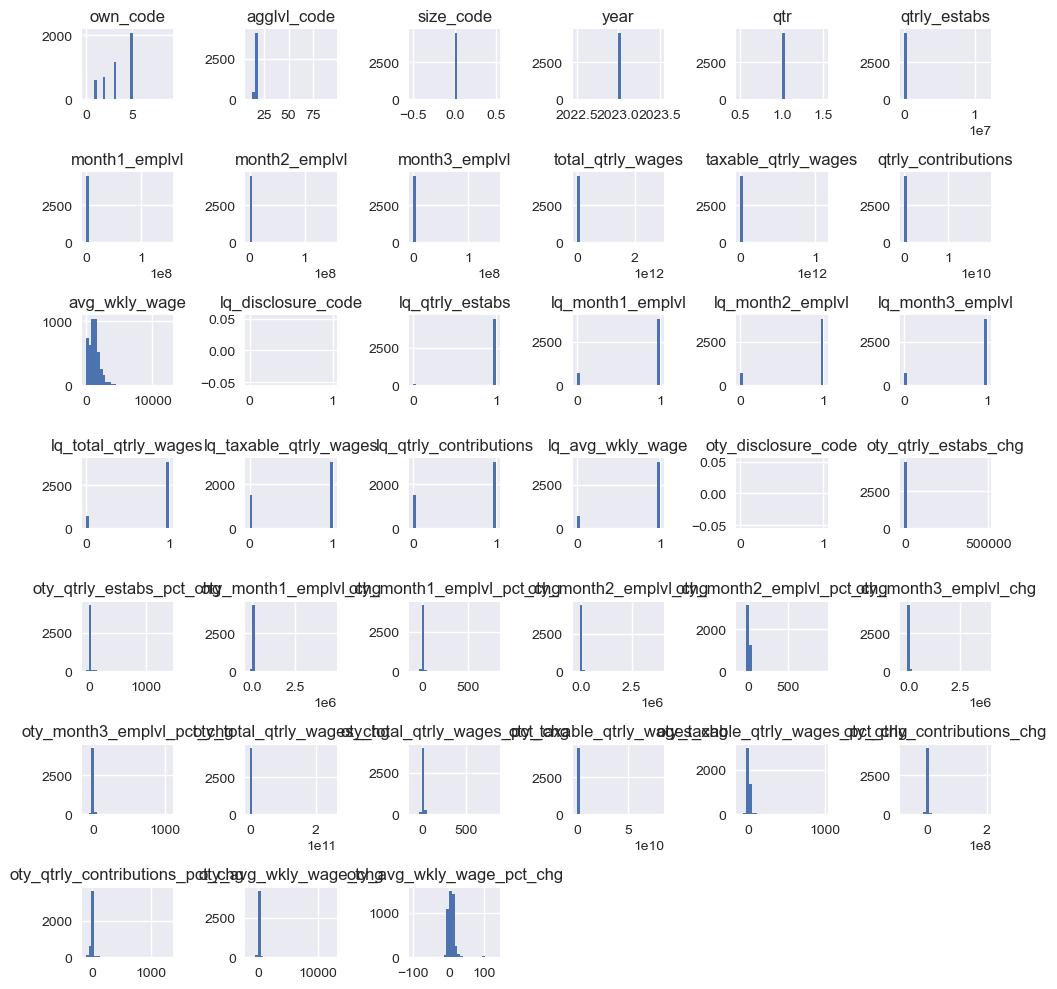

In [29]:
import matplotlib.pyplot as plt

# Plot histograms for numeric columns
data.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()


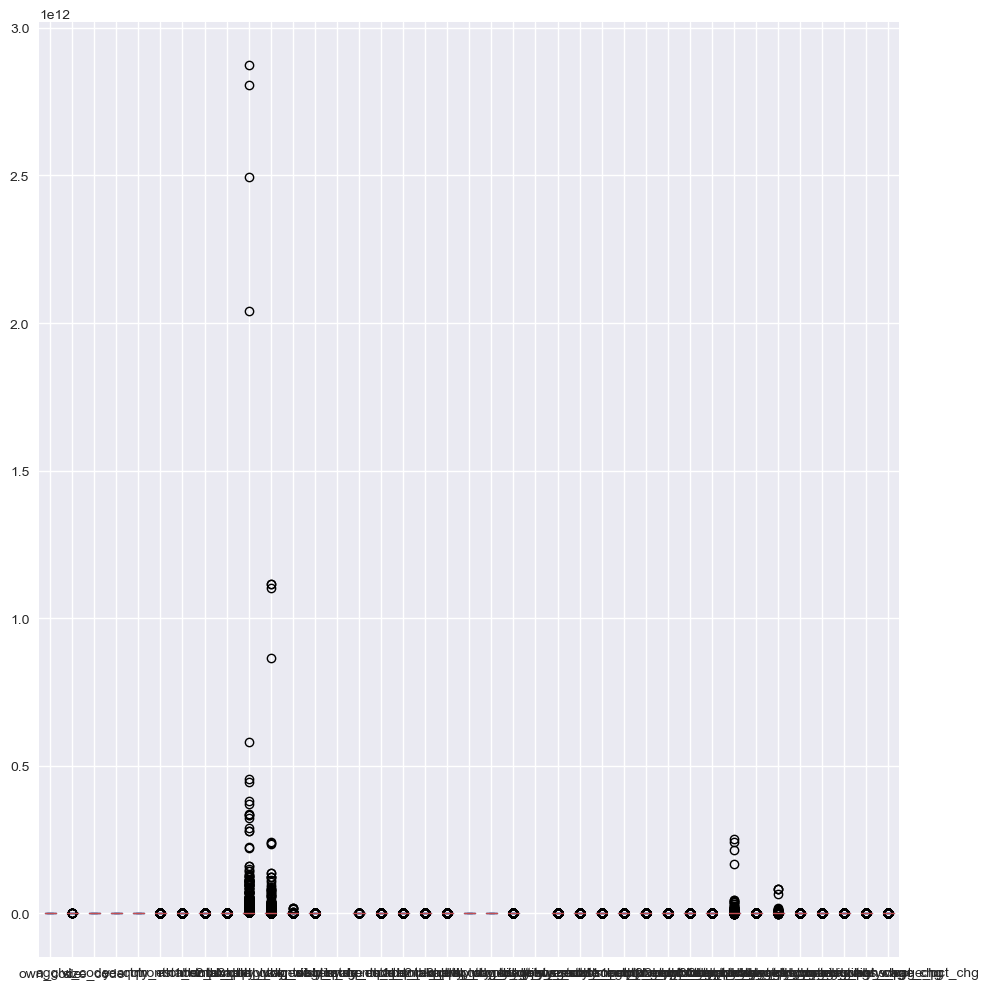

In [30]:
# Plot box plots for numeric columns
data.plot(kind='box', figsize=(10, 10))
plt.tight_layout()
plt.show()


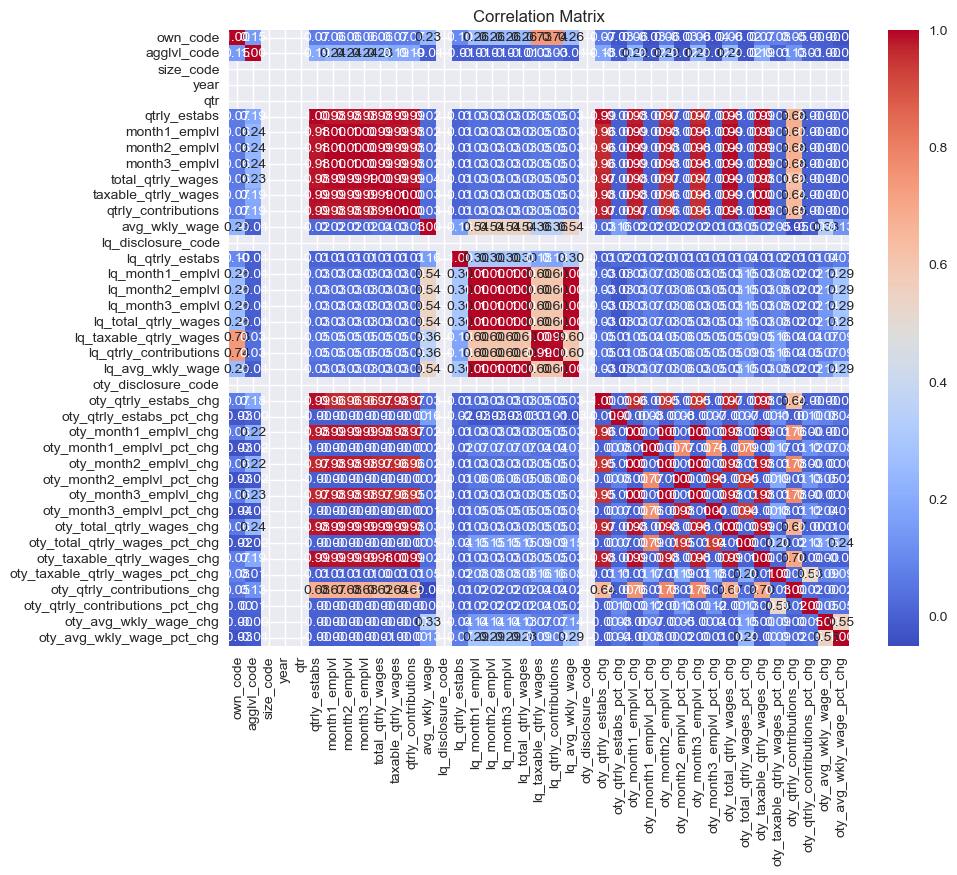

In [32]:
import seaborn as sns
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



<Figure size 1200x600 with 0 Axes>

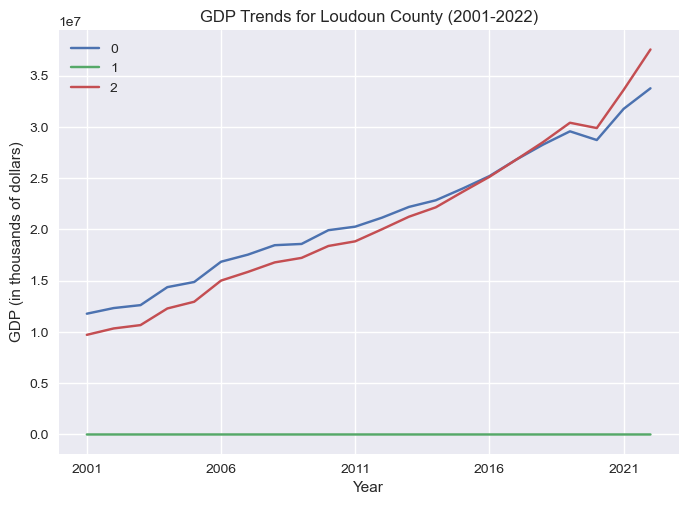

In [33]:
#  Trends Over Time
# Example: GDP trends over years for Loudoun County
gdp_columns = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
loudoun_gdp = pd.read_sql("SELECT * FROM loudoun_county", conn)

# Plotting the trends over years for GDP in Loudoun County
plt.figure(figsize=(12, 6))
loudoun_gdp[gdp_columns].transpose().plot(kind='line')
plt.title("GDP Trends for Loudoun County (2001-2022)")
plt.xlabel('Year')
plt.ylabel('GDP (in thousands of dollars)')
plt.grid(True)
plt.show()


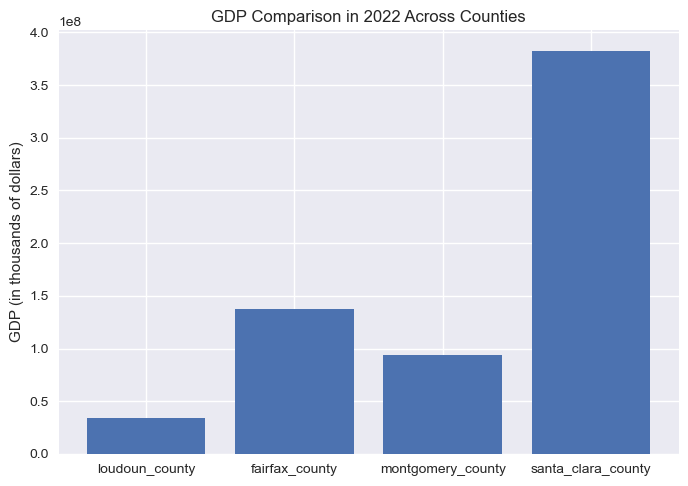

In [35]:
# Comparative Analysis Between Counties
# Compare GDP for different counties
counties = ['loudoun_county', 'fairfax_county', 'montgomery_county', 'santa_clara_county']
gdp_data = {county: pd.read_sql(f"SELECT * FROM {county}", conn) for county in counties}

# Create a plot to compare GDP across counties for the year 2022
gdp_2022 = {county: gdp_data[county]['2022'].iloc[0] for county in counties}
plt.bar(gdp_2022.keys(), gdp_2022.values())
plt.title("GDP Comparison in 2022 Across Counties")
plt.ylabel("GDP (in thousands of dollars)")
plt.show()


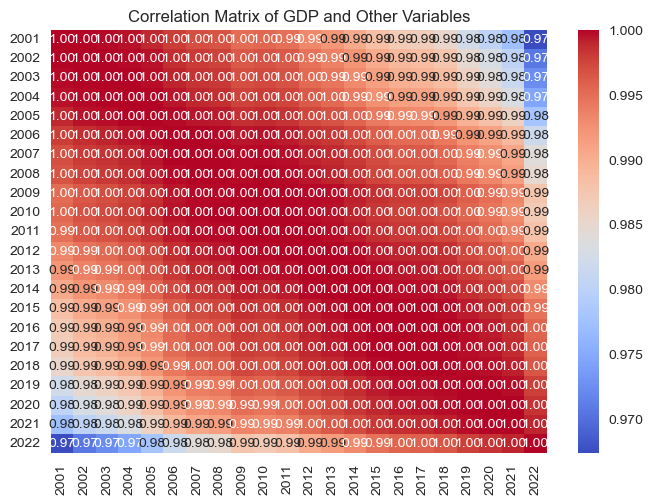

In [36]:
# Correlations Between Variables
# Correlation matrix for GDP and other metrics
gdp_housing_data = pd.read_sql("SELECT * FROM loudoun_county", conn)  # Example for Loudoun County
correlation_matrix = gdp_housing_data[gdp_columns].corr()  # Compute correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of GDP and Other Variables")
plt.show()


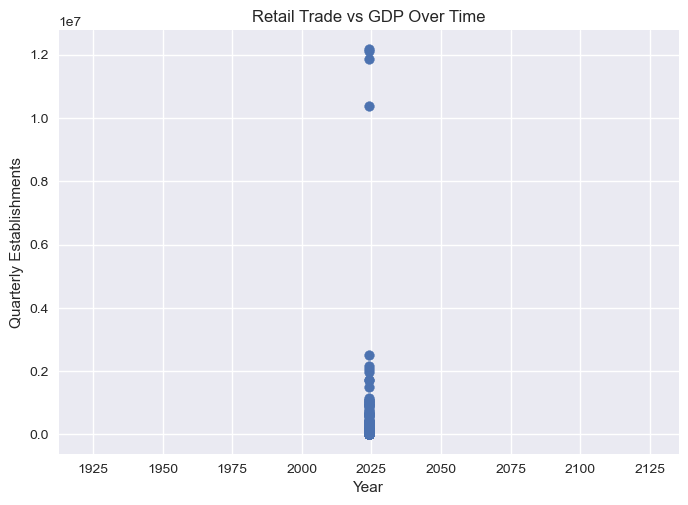

In [37]:
# Sector-Specific Analysis
# Sector-specific analysis: Retail trade vs. GDP for Loudoun County
retail_trade_data = pd.read_sql("SELECT * FROM retail_trade_5", conn)
plt.scatter(retail_trade_data['year'], retail_trade_data['qtrly_estabs'], label='Retail Trade')
plt.title("Retail Trade vs GDP Over Time")
plt.xlabel("Year")
plt.ylabel("Quarterly Establishments")
plt.show()


Missing data:
 geofips        0
geoname        0
linecode       0
description    0
2001           0
2002           0
2003           0
2004           0
2005           0
2006           0
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
dtype: int64


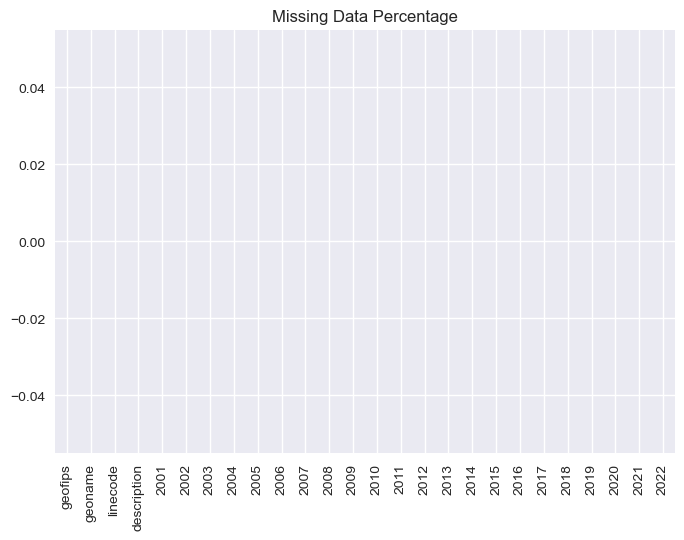

In [38]:
# Checking for missing values in the GDP data for Loudoun County
missing_data = loudoun_gdp.isnull().sum()
print("Missing data:\n", missing_data)

# Plot missing data percentage
missing_data_percentage = missing_data / len(loudoun_gdp) * 100
missing_data_percentage.plot(kind='bar', title="Missing Data Percentage")
plt.show()


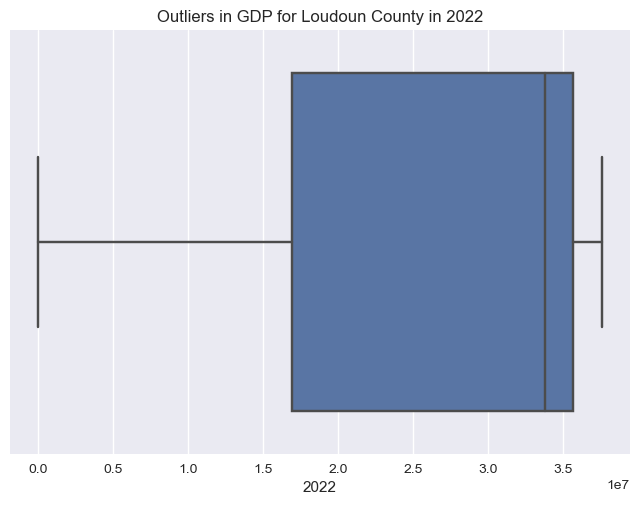

In [39]:
# Boxplot to detect outliers in GDP data for Loudoun County
sns.boxplot(x=loudoun_gdp['2022'])
plt.title("Outliers in GDP for Loudoun County in 2022")
plt.show()
